In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style('whitegrid')
sns.set_context('talk')

In [10]:
def display_cluster(X, km=[], num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    plt.gca().set_aspect('equal')
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0], alpha = alpha, s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_ ==i, 0], X[km.labels_==i, 1], c = color[i], alpha = alpha, s = s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c = color[i], marker = 'x', s = 100)

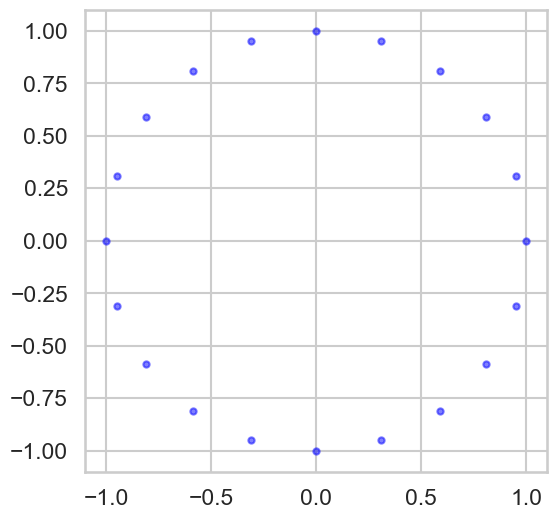

In [11]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)], [np.sin(angle)],0).transpose()

display_cluster(X)

In [31]:
df = pd.read_csv('C:\\Users\\scott\\Documents\\Project-To-Do\\Unsupervised Machine Learning County\\Data\\Country-data.csv')

## need to convert country values to a specific unique Ouput. 

df['country'] = df['country'].astype('category')

df['country_coded'] = df['country'].cat.codes

df.head(5)

### Dataset for KMeans 

converted_dataframe = df.iloc[:,1:]

converted_dataframe.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_coded
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4


In [30]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_coded
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4


In [41]:
num_clusters = 2 
km =KMeans(n_clusters=num_clusters, random_state=10, n_init=1)

km.fit(converted_dataframe)

labels = km.labels_
centers = km.cluster_centers_

resulting_df = converted_dataframe

resulting_df['Clusters'] = labels
#display_cluster(converted_dataframe, km, num_clusters=num_clusters)

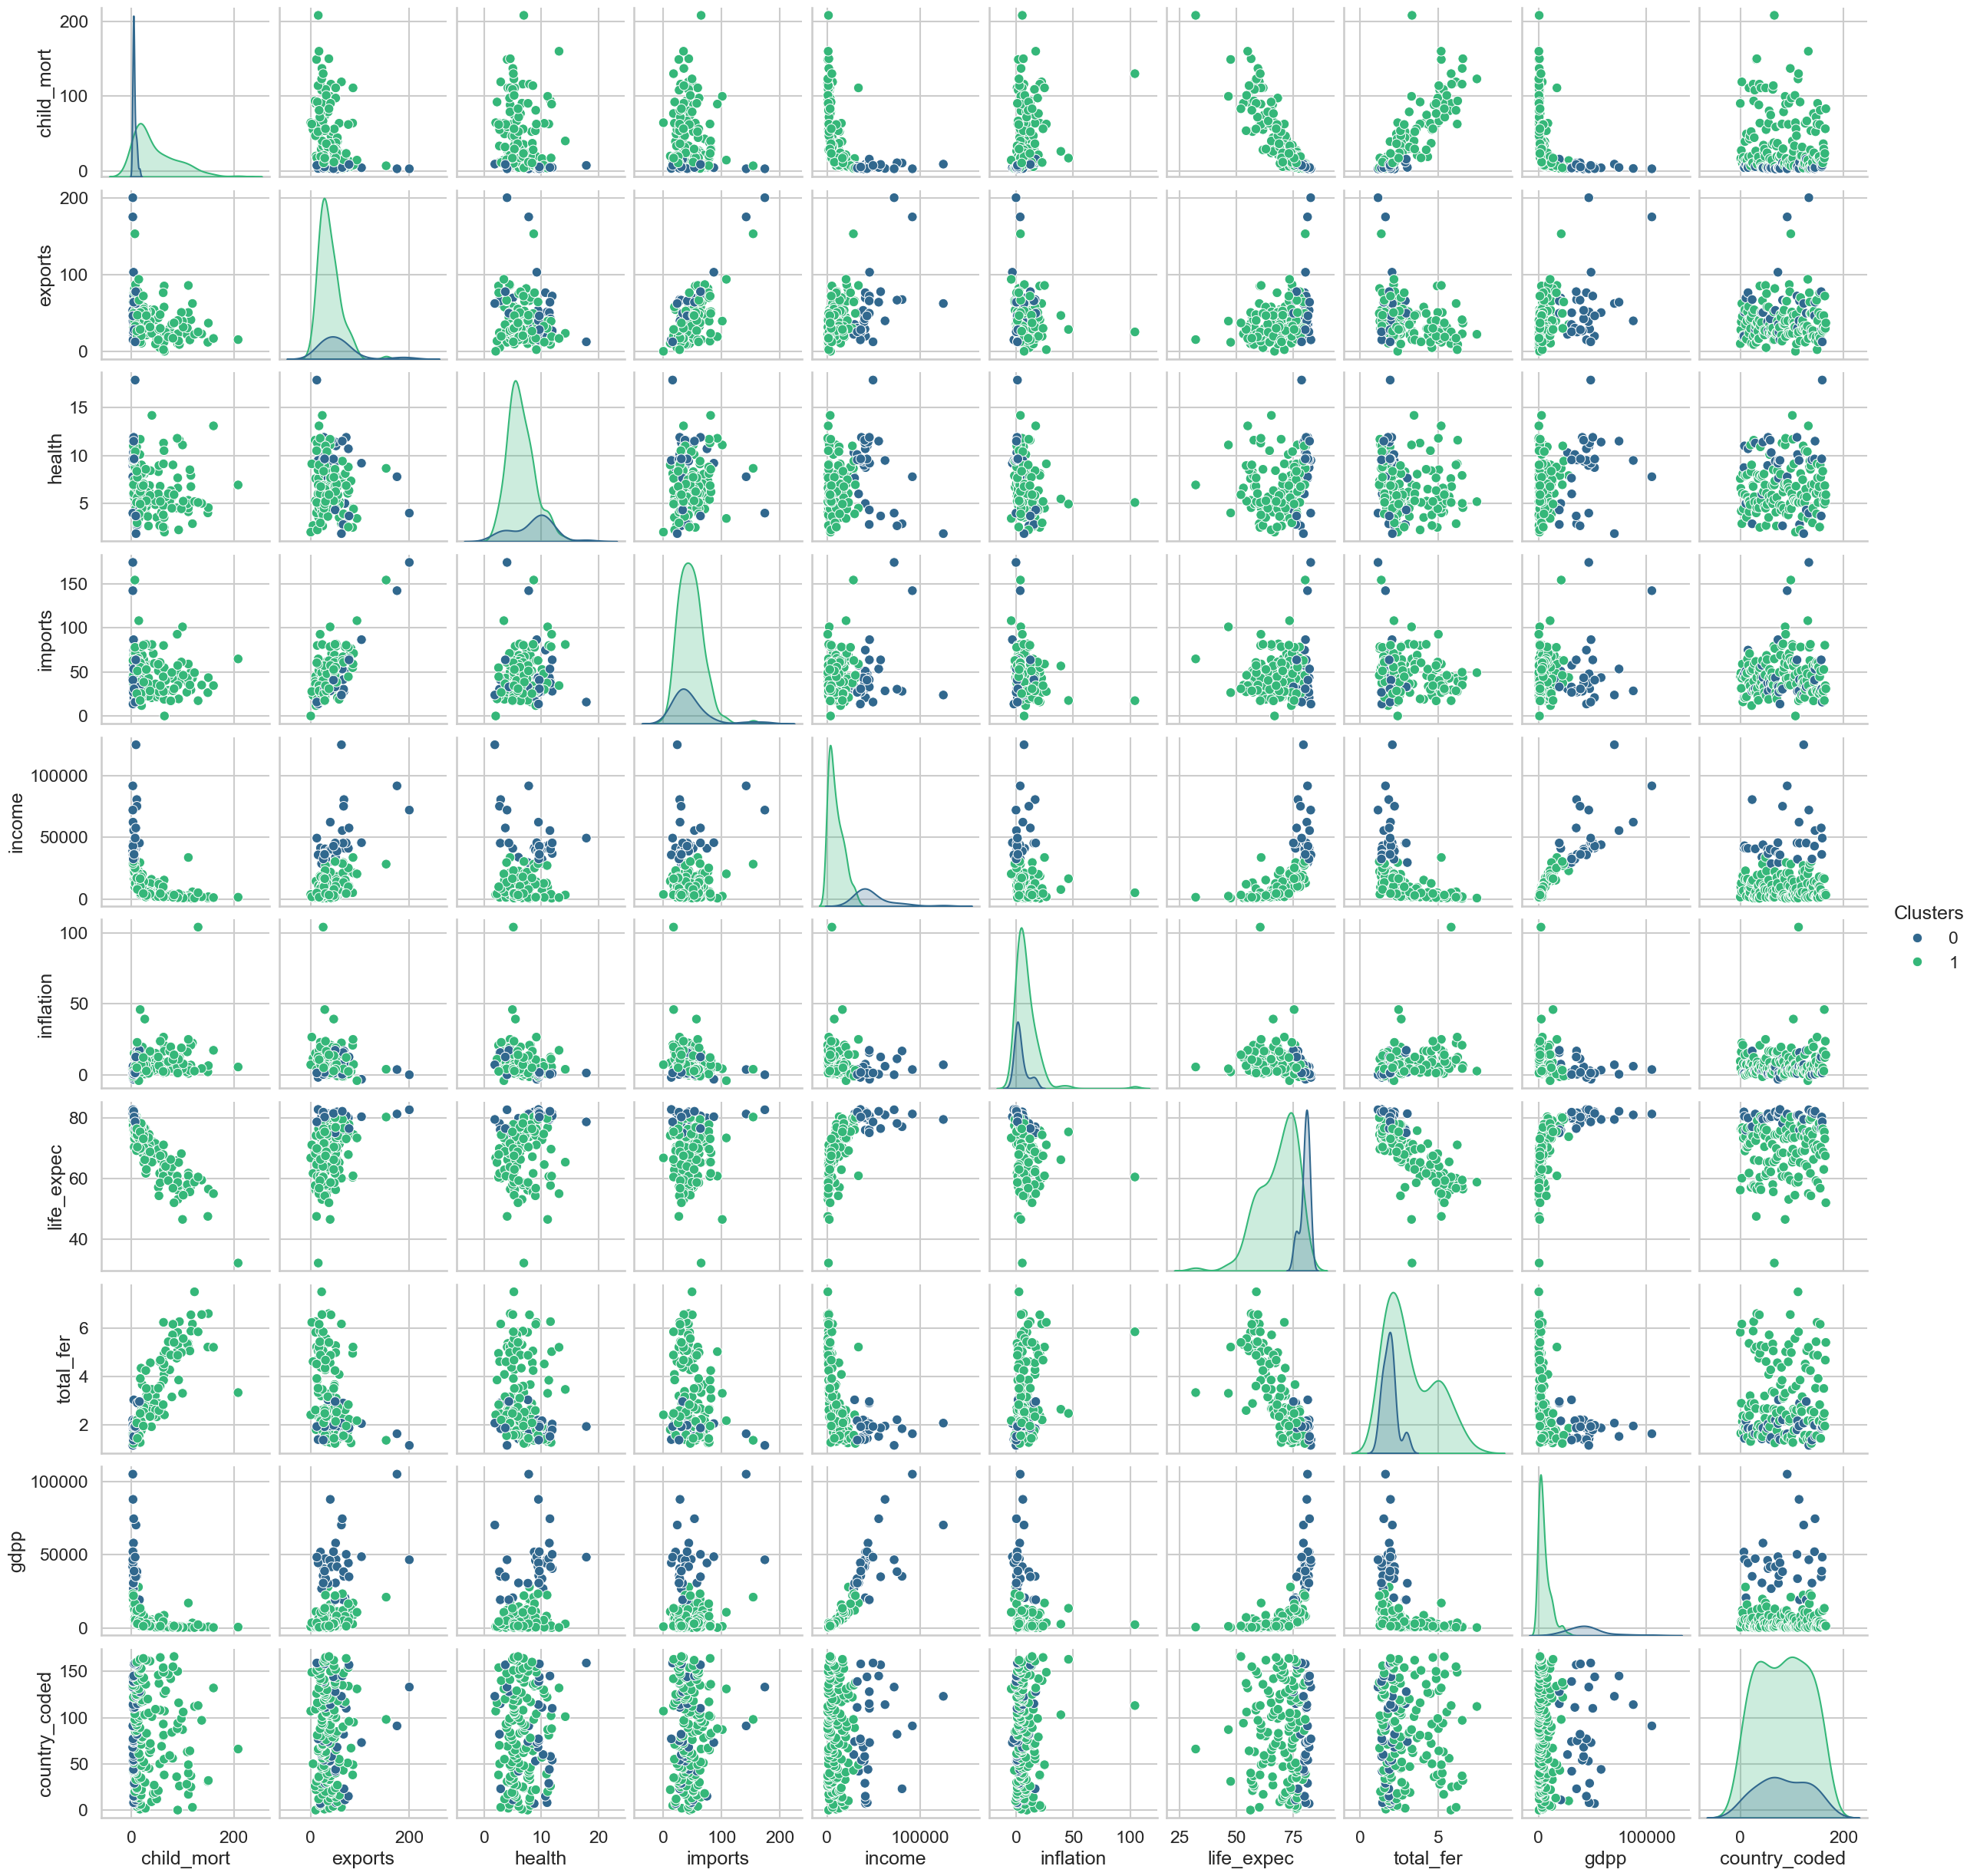

In [42]:
sns.pairplot(resulting_df, hue='Clusters', palette ='viridis')

In [40]:
centers

array([[5.59375000e+00, 5.59687500e+01, 8.48375000e+00, 4.64593750e+01,
        4.89625000e+04, 3.85200000e+00, 8.00968750e+01, 1.88968750e+00,
        4.50906250e+04, 8.37500000e+01],
       [4.60155556e+01, 3.75866593e+01, 6.42029630e+00, 4.69923400e+01,
        9.60268889e+03, 8.71334815e+00, 6.82940741e+01, 3.19881481e+00,
        5.34899259e+03, 8.28222222e+01]])

In [38]:
labels

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])